<b>Homework 03-PCA for Dimensionality Reduction
>Keivn Yang 50541650

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

In [2]:
X, y = load_wine(return_X_y = True)
class_names = ['class_0', 'class_1', 'class_2']

In [3]:
print("X: {}".format(X[:5]))
print("y: {}".format(y[:5]))

X: [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
y: [0 0 0 0 0]


In [4]:
raw_lr_model = make_pipeline(LogisticRegression(random_state = 2019, solver = 'liblinear', multi_class = 'ovr'))

In [5]:
scores = cross_val_score(raw_lr_model, X, y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" %(scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.07)


In [6]:
pca_lr_model = make_pipeline(StandardScaler(), PCA(), LogisticRegression())

In [7]:
scores = cross_val_score(pca_lr_model, X, y, cv = 5)
print("Accuracy (PCA): %0.2f (+/- %0.2f)" %(scores.mean(), scores.std() *2))

Accuracy (PCA): 0.98 (+/- 0.03)


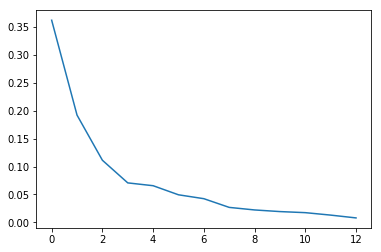

In [8]:
pca1 = pca_lr_model.fit(X,y).named_steps.pca
plt.plot(pca1.explained_variance_ratio_)

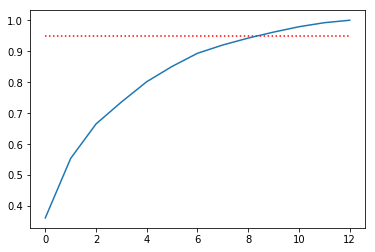

In [9]:
cumulative_variance = np.cumsum(pca1.explained_variance_ratio_)
plt.plot(cumulative_variance)
plt.hlines([0.95], 0, 12, colors = ['red'], linestyles = ['dotted'])

In [10]:
for i, v in enumerate(cumulative_variance):
    print("PC{}: {:.3f}%".format(i+1, v))

PC1: 0.362%
PC2: 0.554%
PC3: 0.665%
PC4: 0.736%
PC5: 0.802%
PC6: 0.851%
PC7: 0.893%
PC8: 0.920%
PC9: 0.942%
PC10: 0.962%
PC11: 0.979%
PC12: 0.992%
PC13: 1.000%


In [11]:
pca8_lr_model = make_pipeline(StandardScaler(), PCA(n_components = 8), LogisticRegression())

In [12]:
scores = cross_val_score(pca8_lr_model, X, y, cv = 5)
print("Accuracy (8 PCs): %0.2f (+/- %0.2f)" %(scores.mean(), scores.std() * 2))

Accuracy (8 PCs): 0.97 (+/- 0.08)


In [13]:
pca4_lr_model = make_pipeline(StandardScaler(), PCA(n_components = 4), LogisticRegression())

In [14]:
scores = cross_val_score(pca4_lr_model, X, y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" %(scores.mean(), scores.std() * 2))

Accuracy: 0.95 (+/- 0.07)


In [15]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = 'center', color = 'white' if cm[i, j] > thresh else 'black')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()

In [16]:
indices = [i for i in range(len(y))]
train_indices, test_indices = train_test_split(indices, test_size = 0.33, shuffle = True)

Confusion Matrix Without PCA
Raw confusion matrix: 
[[19  1  0]
 [ 0 22  0]
 [ 0  0 17]]
[[0.95 0.05 0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]]


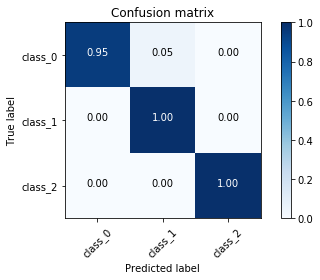

In [17]:
pred_y_raw = raw_lr_model.fit(X[train_indices], y[train_indices]).predict(X[test_indices])
print("Confusion Matrix Without PCA")
print("Raw confusion matrix: ")
cm1 = confusion_matrix(y[test_indices], pred_y_raw)
print(cm1)
plot_confusion_matrix(cm1, class_names, normalize = True)

Confusion Matrix With PCA
Raw confusion matrix: 
[[20  0  0]
 [ 0 22  0]
 [ 0  0 17]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


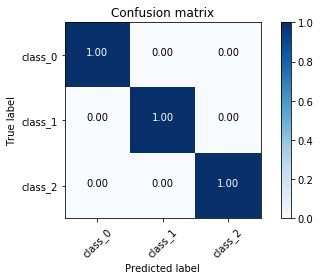

In [18]:
pred_y_raw = pca_lr_model.fit(X[train_indices], y[train_indices]).predict(X[test_indices])
print("Confusion Matrix With PCA")
print("Raw confusion matrix: ")
cm1 = confusion_matrix(y[test_indices], pred_y_raw)
print(cm1)
plot_confusion_matrix(cm1, class_names, normalize = True)

Confusion Matrix With 8 PCAs
Raw confusion matrix: 
[[20  0  0]
 [ 0 22  0]
 [ 0  0 17]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


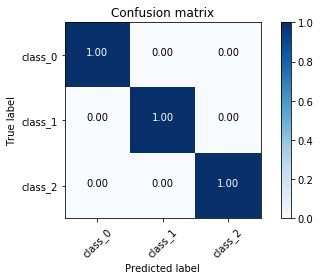

In [19]:
pred_y_raw = pca8_lr_model.fit(X[train_indices], y[train_indices]).predict(X[test_indices])
print("Confusion Matrix With 8 PCAs")
print("Raw confusion matrix: ")
cm1 = confusion_matrix(y[test_indices], pred_y_raw)
print(cm1)
plot_confusion_matrix(cm1, class_names, normalize = True)

Confusion Matrix With 4 PCAs
Raw confusion matrix: 
[[20  0  0]
 [ 1 21  0]
 [ 0  0 17]]
[[1.         0.         0.        ]
 [0.04545455 0.95454545 0.        ]
 [0.         0.         1.        ]]


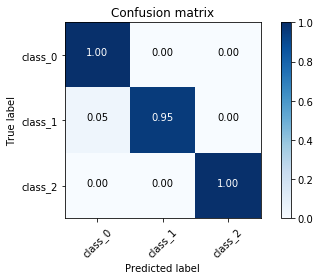

In [20]:
pred_y_raw = pca4_lr_model.fit(X[train_indices], y[train_indices]).predict(X[test_indices])
print("Confusion Matrix With 4 PCAs")
print("Raw confusion matrix: ")
cm1 = confusion_matrix(y[test_indices], pred_y_raw)
print(cm1)
plot_confusion_matrix(cm1, class_names, normalize = True)